In [3]:
#fakhliq (329)
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread("nama_baru.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [13]:
#Red
low_red1 = np.array([0, 100, 100])
up_red1 = np.array([10, 255, 255])
low_red2 = np.array([160, 100, 100])
up_red2 = np.array([180, 255, 255])
mask_red = cv2.bitwise_or(cv2.inRange(hsv, low_red1, up_red1),
                          cv2.inRange(hsv, low_red2, up_red2))


# Green
low_green = np.array([40, 100, 100])
up_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, low_green, up_green)


#Blue
low_blue = np.array([100, 100, 100])
up_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, low_blue, up_blue)


def highlight_non_color_text(mask_color):
    result = np.ones_like(img_rgb) * 255  # background putih
    
   
    white_bg_mask = np.all(img_rgb >= [180, 180, 180], axis=-1)
    
   
    text_mask = np.logical_and(mask_color == 0, ~white_bg_mask)
    
    
    result[text_mask] = [0, 0, 0]
    
    return result

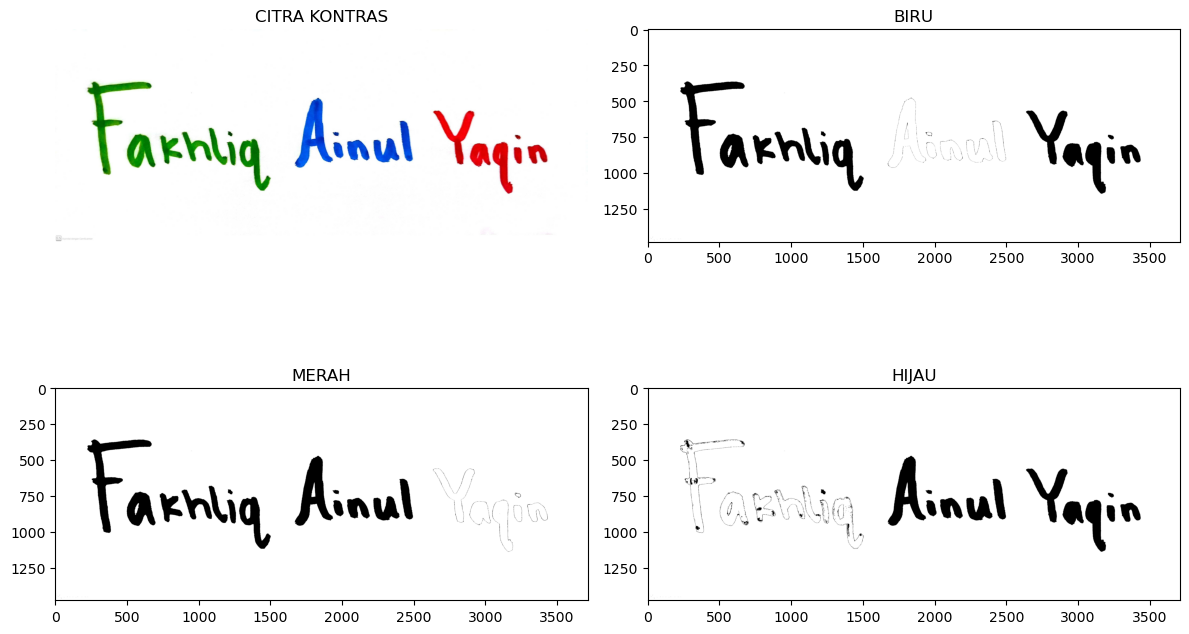

In [15]:
highlight_blue = highlight_non_color_text(mask_blue)
highlight_red = highlight_non_color_text(mask_red)
highlight_green = highlight_non_color_text(mask_green)

plt.figure(figsize=(12, 8))

# Citra asli
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("CITRA KONTRAS")
plt.axis('off')

# Biru
plt.subplot(2, 2, 2)
plt.imshow(highlight_blue)
plt.title("BIRU")
plt.axis('on')

# Merah
plt.subplot(2, 2, 3)
plt.imshow(highlight_red)
plt.title("MERAH")
plt.axis('on')

# Hijau
plt.subplot(2, 2, 4)
plt.imshow(highlight_green)
plt.title("HIJAU")
plt.axis('on')

plt.tight_layout()
plt.show()

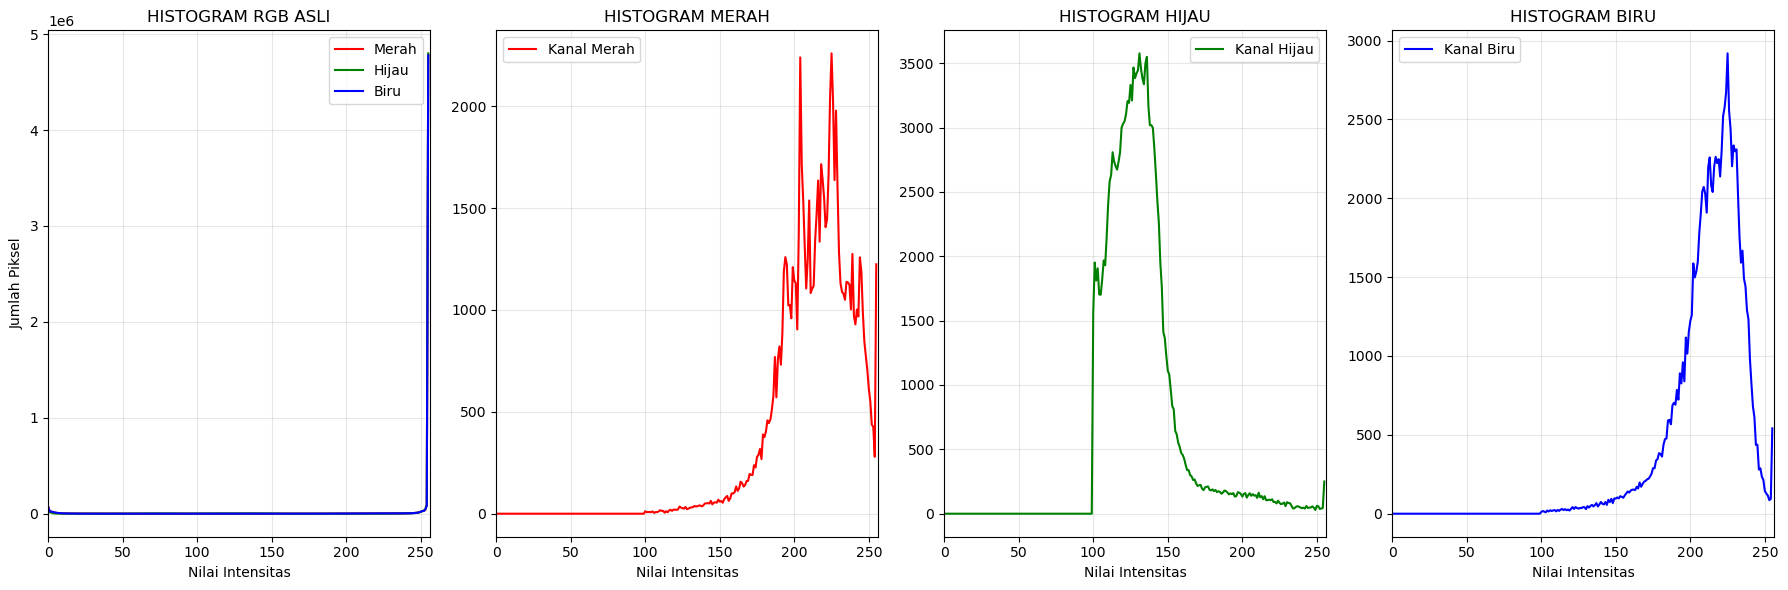

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
color = ('r', 'g', 'b')
labels = ('Merah', 'Hijau', 'Biru')
for i, (col, label) in enumerate(zip(color, labels)):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=label)
    
plt.title("HISTOGRAM RGB ASLI")
plt.xlabel('Nilai Intensitas')
plt.ylabel('Jumlah Piksel')
plt.xlim([0, 256])
plt.legend()
plt.grid(True, alpha=0.3)

# Histogram area merah 
plt.subplot(1, 4, 2)
hist_red = cv2.calcHist([img_rgb], [0], mask_red, [256], [0, 256])
plt.plot(hist_red, color='r', label='Kanal Merah')
plt.title("HISTOGRAM MERAH")
plt.xlabel('Nilai Intensitas')
plt.xlim([0, 256])
plt.legend()
plt.grid(True, alpha=0.3)

# Histogram area hijau
plt.subplot(1, 4, 3)
hist_green = cv2.calcHist([img_rgb], [1], mask_green, [256], [0, 256])
plt.plot(hist_green, color='g', label='Kanal Hijau')
plt.title("HISTOGRAM HIJAU")
plt.xlabel('Nilai Intensitas')
plt.xlim([0, 256])
plt.legend()
plt.grid(True, alpha=0.3)

# Histogram area biru
plt.subplot(1, 4, 4)
hist_blue = cv2.calcHist([img_rgb], [2], mask_blue, [256], [0, 256])
plt.plot(hist_blue, color='b', label='Kanal Biru')
plt.title("HISTOGRAM BIRU")
plt.xlabel('Nilai Intensitas')
plt.xlim([0, 256])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()